In [108]:
import pandas as pd
import numpy as np

import os
from datetime import datetime

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
data_path = '../data/tip.csv'

In [111]:
data_path

'../data/tip.csv'

In [112]:
df = pd.read_csv(data_path)

In [113]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [114]:
df.shape

(244, 7)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [116]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [117]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: >

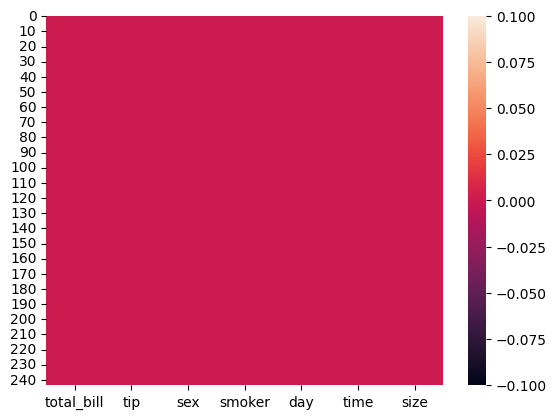

In [119]:
sns.heatmap(df.isnull())

In [120]:
def separate_columns(df:pd.DataFrame)->tuple[list[str],list[str]]:
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()
    return numeric_cols,categorical_columns

In [121]:
numeric_cols, categorical_cols = separate_columns(df)

In [122]:
numeric_cols

['total_bill', 'tip', 'size']

In [123]:
categorical_cols

['sex', 'smoker', 'day', 'time']

In [124]:
def plot_numeric_histograms(cols: list) -> None:
    """Plot 3 numeric columns side-by-side as histograms."""
    rows = len(cols) // 3 if len(cols) % 3 == 0 else (len(cols) // 3) + 1
        
    fig, axes = plt.subplots(rows, 3, figsize=(18, 5*rows))
    
    for i, col in enumerate(cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

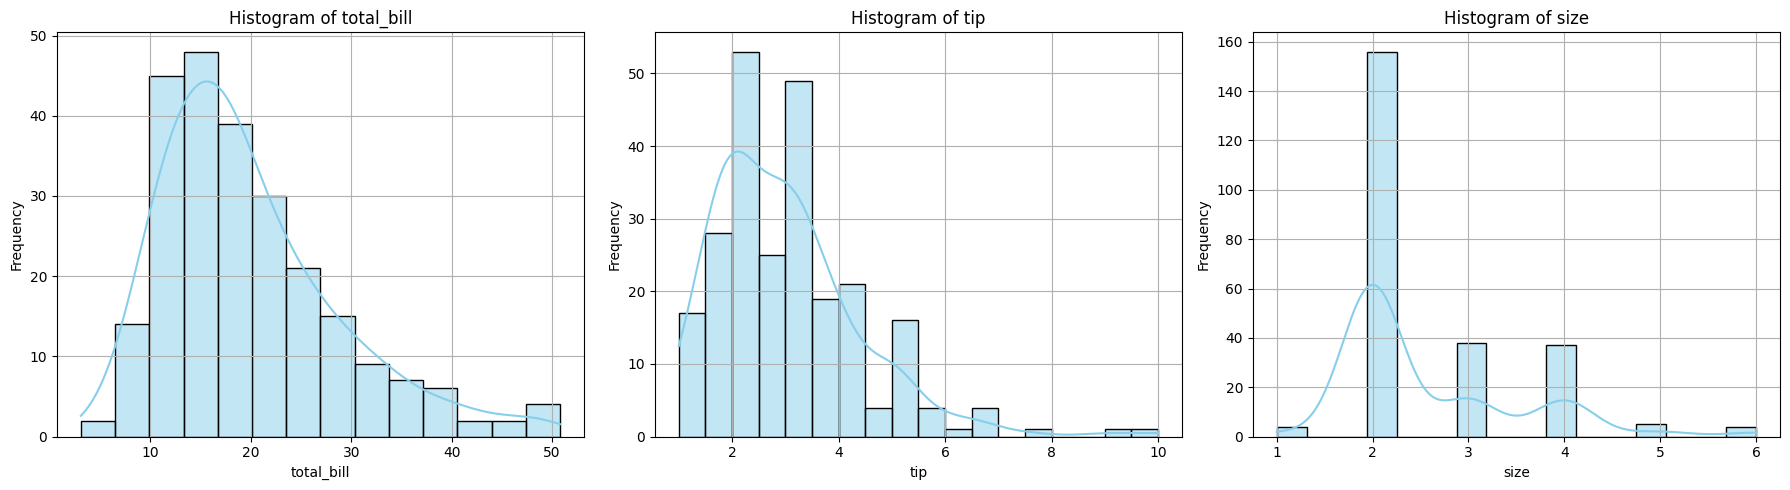

In [125]:
plot_numeric_histograms(numeric_cols)

## Transforming  the Data

In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
le = LabelEncoder()

In [128]:
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for this column
    
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"\nColumn: {col}")
    print(mapping)


Column: sex
{'Female': 0, 'Male': 1}

Column: smoker
{'No': 0, 'Yes': 1}

Column: day
{'Fri': 0, 'Sat': 1, 'Sun': 2, 'Thur': 3}

Column: time
{'Dinner': 0, 'Lunch': 1}


In [147]:
#joblib.dump(label_encoders, '../src/models/label_encoders.pkl')

In [130]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


## Visualizing the Data

In [131]:
def calculate_correlation(df: pd.DataFrame) -> pd.DataFrame:
    """Return the correlation matrix for numeric columns."""
    return df.corr()

In [132]:

def plot_correlation_heatmap(corr_matrix: pd.DataFrame, title: str = 'Correlation Heatmap') -> None:
    """Plot a heatmap given a correlation matrix."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
    plt.title(title)
    plt.show()

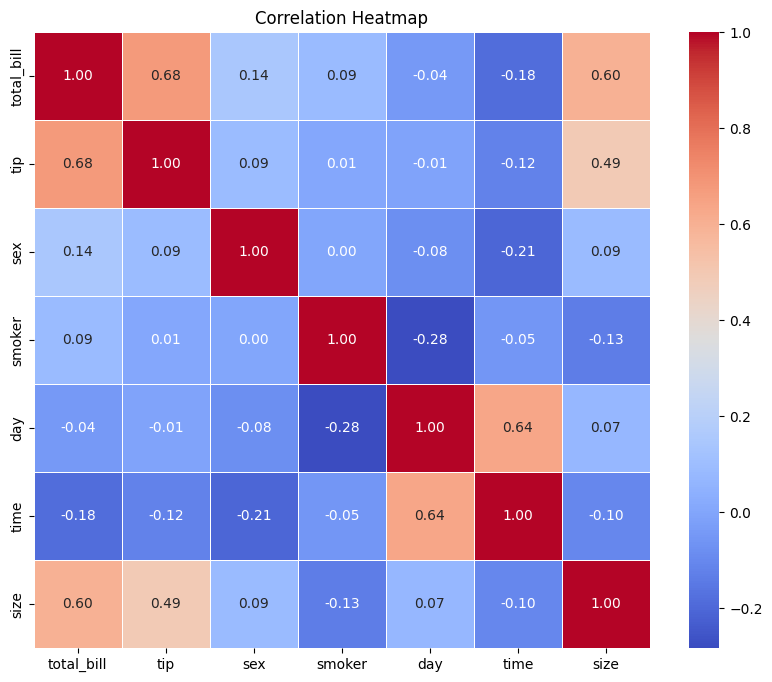

In [133]:
# Calculate correlation and plot
corr_matrix = calculate_correlation(df)
plot_correlation_heatmap(corr_matrix)

In [134]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [135]:
def split_features_target(df: pd.DataFrame, target_col: str):
    """Split DataFrame into features (X) and target (y)."""
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return X, y

In [136]:
def split_train_test(X, y, test_size=0.2, random_state=42):
    """Split features and target into train and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [138]:
X, y = split_features_target(df, target_col='tip')  # Replace with your column name

In [139]:
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.2)

In [140]:
print(f'Training Features: {X_train.shape}')
print(f'Testing Features: {X_test.shape}')
print(f'Training Labels: {y_train.shape}')
print(f'Testing Labels: {y_test.shape}')

Training Features: (195, 6)
Testing Features: (49, 6)
Training Labels: (195,)
Testing Labels: (49,)


In [141]:
def scale_features(X_train, X_test):
    """Apply StandardScaler to training and testing feature sets."""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

In [142]:
def save_scaler(scaler, filepath: str) -> None:
    """Save the fitted scaler object to the specified filepath."""
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    joblib.dump(scaler, filepath)

In [143]:
MODEL_SAVE_PATH = '../src/models/'

In [144]:
# Scale features
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

In [145]:
scaler

StandardScaler()

In [63]:
#save_scaler(scaler, os.path.join(MODEL_SAVE_PATH,'scaler.pkl'))

In [148]:
from sklearn.base import BaseEstimator

def train_model(model: BaseEstimator, X_train, y_train):
    """Train the given sklearn model on the provided training data."""
    model.fit(X_train, y_train)
    return model

In [149]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
model = RandomForestRegressor()

# Train model using modular function
trained_model = train_model(model, X_train_scaled, y_train)

In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error (MSE): 35.05
Mean Absolute Error (MAE): 5.81
R2 Score: -27.04


In [151]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [152]:
def tune_hyperparameters(model, param_grid, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'):
    """Perform Grid Search to find the best hyperparameters."""
    grid = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid.fit(X_train, y_train)
    return grid.best_estimator_, grid.best_params_

In [153]:
best_model, best_params = tune_hyperparameters(model, params, X_train, y_train)


In [154]:
# Display results
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [155]:
print("Best model:", best_model)

Best model: RandomForestRegressor(max_depth=5, min_samples_split=5)


In [156]:
def make_predictions(model, X_test):
    """Use the trained model to make predictions on test data."""
    return model.predict(X_test)

In [157]:
y_pred_tuned1 = make_predictions(best_model, X_test)

In [158]:
y_pred_tuned = best_model.predict(X_test)

In [159]:
mse = mean_squared_error(y_test, y_pred_tuned)
mae = mean_absolute_error(y_test, y_pred_tuned)
r2 = r2_score(y_test, y_pred_tuned)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error (MSE): 1.00
Mean Absolute Error (MAE): 0.77
R2 Score: 0.20


In [160]:
def evaluate_regression_model(y_true, y_pred):
    """Evaluate regression model and print MSE, MAE, and R2 Score."""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R2 Score: {r2:.2f}')

    return mse, mae, r2

In [161]:
mse, mae, r2 = evaluate_regression_model(y_test, y_pred_tuned1)

Mean Squared Error (MSE): 1.00
Mean Absolute Error (MAE): 0.77
R2 Score: 0.20


In [162]:
def save_model(model, filepath: str) -> None:
    """Save the trained model to the specified file path."""
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    joblib.dump(model, filepath)
    print(f'Model saved to: {filepath}')

In [163]:
save_model(best_model, os.path.join(MODEL_SAVE_PATH,'RFRegressor_best.pkl'))

Model saved to: ../src/models/RFRegressor_best.pkl


In [164]:
test_data1 = pd.DataFrame({
    'total_bill':20.56,
    'sex':'Male',
    'smoker':'No',
    'day':'Sat',
    'time':'Dinner',
    'size':5
}, index=[0])

In [165]:
test_data1

,total_bill,sex,smoker,day,time,size
0,20.56,Male,No,Sat,Dinner,5


In [166]:
def encode_categorical_features(df, label_encoders: dict, categorical_cols: list):
    """Apply pre-fitted label encoders to categorical columns."""
    df_encoded = df.copy()
    for col in categorical_cols:
        le = label_encoders[col]
        df_encoded[col] = le.transform(df_encoded[col])
    return df_encoded

In [167]:
def scale_features(df, scaler):
    """Scale numeric features using pre-fitted scaler."""
    return scaler.transform(df)

In [168]:
def predict_new_data(model, new_data_scaled):
    """Predict using the trained regression model."""
    return model.predict(new_data_scaled)

In [170]:
label_encoders = joblib.load('../src/models/label_encoders.pkl')

In [176]:
df_encoded = encode_categorical_features(test_data1,label_encoders,categorical_cols)

In [177]:
df_encoded

,total_bill,sex,smoker,day,time,size
0,20.56,1,0,1,0,5


In [180]:
scaler = joblib.load('../src/models/scaler.pkl')

In [178]:
scaled_test_data1 = scaler.transform(df_encoded)

In [179]:
scaled_test_data1

array([[ 0.03912988,  0.73173292, -0.79056942, -0.76167571, -0.61093325,
         2.58520127]])

In [181]:
loaded_model = joblib.load('../src/models/RFRegressor_best.pkl')

In [182]:
loaded_model.predict(scaled_test_data1)

array([2.18553073])

In [4]:
import sklearn
print(sklearn.__version__)

1.3.0


In [5]:
import numpy
print(numpy.__version__)

1.24.1


In [8]:
!pip install numpy==1.25.3

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.25.3 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [9]:
!pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   --------- ------------------------------ 0.5/1.8 MB 14.2 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/1.8 MB 12.7 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 12.9 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 10.6 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\siddhesh.masurkar\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import scipy
print(scipy.__version__)

1.11.1
